In [17]:
from pyaltim.portals.dahiti import DahitiConnect
import shapely
import pandas as pd

## Case: Lake Tana

##### Load the polygon for Lake Tana as a shapely object
A Geojson file of any area can be developed using this webapp: https://geojson.io/#map=9.35/24.5561/89.6891

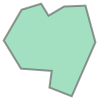

In [9]:
with open('Data/Lake_Tana.geojson','rb') as fid:
    tanapoly=shapely.from_geojson(fid.read())

display(tanapoly)

##### Create a connection manager for Dahiti

In [10]:
# retrieve the current catalogue of station listings
dacon=DahitiConnect()
dahtargets=dacon.list_targets(tanapoly)

Please input your Dahiti v2 API v2 key ········


In [11]:
display(dahtargets)
#get the water level series
info,ds_dah_wl=dacon.get_waterlevel(dahtargets['dahiti_id'][0].item())
ds_dah_wl['time']=pd.to_datetime(ds_dah_wl.time)

,dahiti_id,target_name,location,continent,country,type,data_access,geometry
0,110,"Tana, Lake",None,Africa,Ethiopia,Lake,water_level_altimetry:public,POINT (37.30000 11.95000)


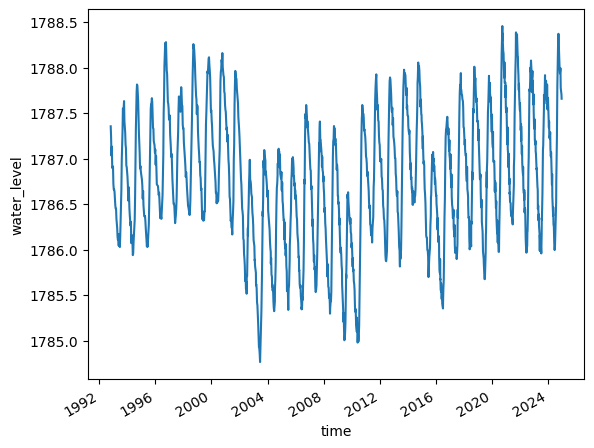

In [18]:

ds_dah_wl.water_level.plot()

## Case: Ganges - Brahmaputra - Meghna (GBM) Confluence

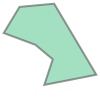

In [12]:
with open('Data/GBM_Basin.geojson','rb') as fid:
    gbmpoly=shapely.from_geojson(fid.read())

display(gbmpoly)

,dahiti_id,target_name,location,continent,country,type,data_access,geometry
0,22162,"Banar, River",None,Asia,Bangladesh,River,water_level_altimetry:public,POINT (90.51250 23.77530)
1,10889,"Brahmaputra, River",None,Asia,Bangladesh,River,water_level_altimetry:public,POINT (89.74360 24.04880)
2,10888,"Brahmaputra, River",None,Asia,Bangladesh,River,water_level_altimetry:public,POINT (89.76880 24.13980)
3,11590,"Ganges, River",None,Asia,Bangladesh,River,water_level_altimetry:public,POINT (89.56680 23.80980)
4,22149,"Ganges, River",None,Asia,Bangladesh,River,water_level_altimetry:public,POINT (88.98080 24.15050)
5,22148,"Ganges, River",None,Asia,Bangladesh,River,water_level_altimetry:public,POINT (90.21270 23.47230)
6,17553,"Ganges, River",None,Asia,Bangladesh,River,water_level_altimetry:public,POINT (89.05910 23.98740)
7,17217,"Ganges, River",None,Asia,Bangladesh,River,water_level_altimetry:public,POINT (89.81480 23.76380)
8,15372,"Ganges, River",None,Asia,Bangladesh,River,water_level_altimetry:public,POINT (90.11620 23.52000)
9,12883,"Ganges, River",None,Asia,Bangladesh,River,water_level_altimetry:public,POINT (89.02660 24.07630)


<Axes: >

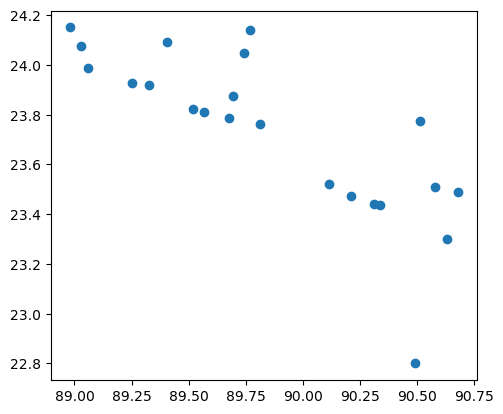

In [13]:
gbmtargets=dacon.list_targets(gbmpoly)
display(gbmtargets)
gbmtargets.plot()
#get the water level series
# info,ds_dah_wl=dacon.get_waterlevel(gbmtargets['dahiti_id'][0].item())

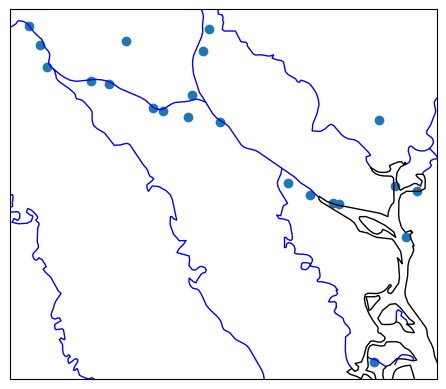

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ax=plt.axes(projection=ccrs.PlateCarree())
gbmtargets.plot(ax=ax)
ax.coastlines()
ax.add_feature(cfeature.RIVERS, zorder=1, edgecolor='b')